<a href="https://colab.research.google.com/github/ziababar/demos/blob/master/derivative_security/image_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pysource.com/2018/07/19/check-if-two-images-are-equal-with-opencv-and-python/
https://pysource.com/2018/07/20/find-similarities-between-two-images-with-opencv-and-python/

https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/
https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/
https://pypi.org/project/ImageHash/ (https://datascience.stackexchange.com/questions/28840/compare-image-similarity-in-python)
https://rosettacode.org/wiki/Percentage_difference_between_images#Python


There are 2 fundamental elements to consider:

The images have both the same size and channels
Each pixel has the same value
We’re going first to load the images. If you want to download the images I used, you can go at the end of this article to download the entire source code with the files.

First we load the original and then the duplicate.

In [1]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 141kB/s 
     |████████████████████████████████| 20.2MB 1.4MB/s 
ERROR: tensor2tensor 1.14.1 requires opencv-python, which is not installed.
ERROR: stable-baselines 2.2.1 requires opencv-python, which is not installed.
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninst

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from google.colab.patches import cv2_imshow


In [0]:
url = 'https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/original_golden_bridge-300x169.jpg'
original = cv2.imread("https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/original_golden_bridge-300x169.jpg")
duplicate = cv2.imread("https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/original_golden_bridge-300x169.jpg")




In [0]:
# download the image, convert it to a NumPy array, and then read
def url_to_image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

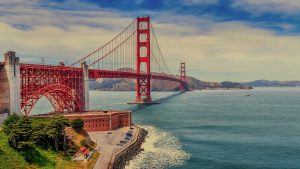

In [4]:
original = url_to_image("https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/original_golden_bridge-300x169.jpg")
cv2_imshow(original)


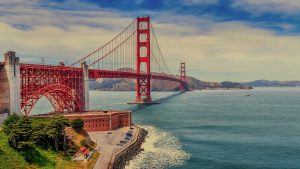

In [5]:
duplicate = url_to_image("https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/original_golden_bridge-300x169.jpg")
cv2_imshow(duplicate)


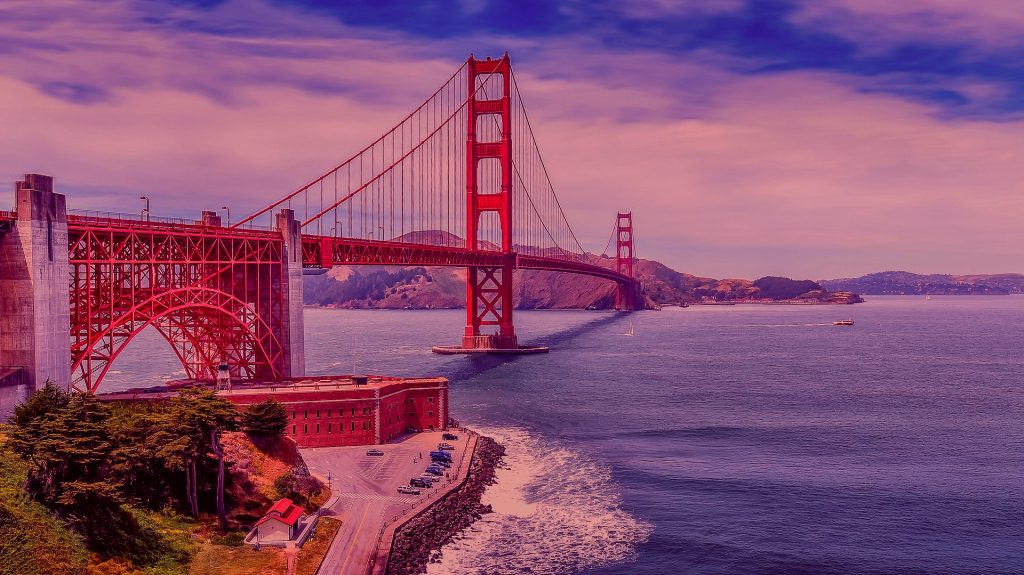

In [6]:
mixed_colors = url_to_image("https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/mixed_colors-1024x575.jpg")
cv2_imshow(mixed_colors)


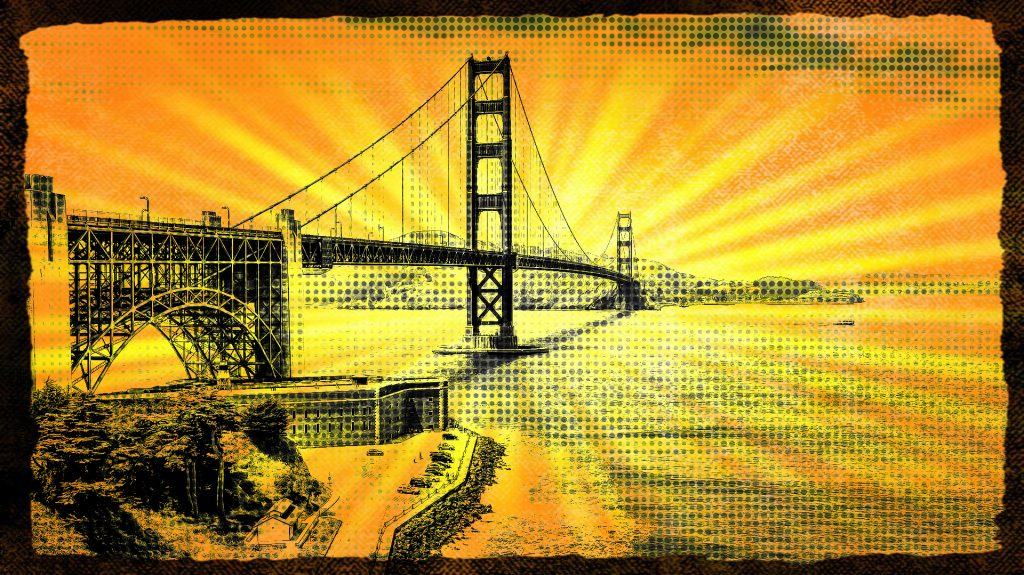

In [7]:
sunburst = url_to_image("https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/sunburst-1024x575.jpg")
cv2_imshow(sunburst)


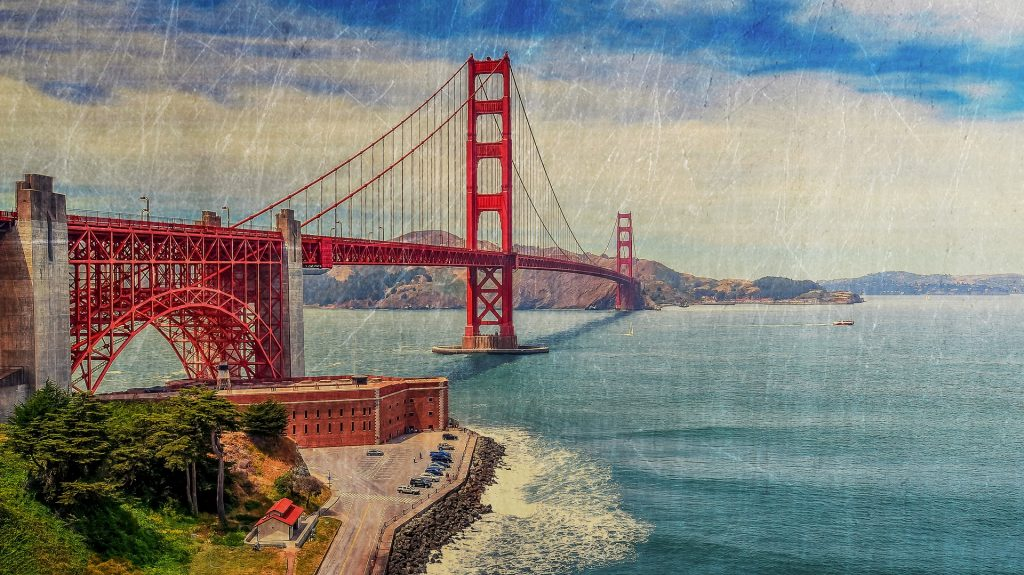

In [8]:
textured = url_to_image("https://raw.githubusercontent.com/ziababar/demos/master/derivative_security/data/textured-1024x575.jpg")
cv2_imshow(textured)

First we check if they have the same size and channels. If they have the same size and channels, we continue further with the operation, if they don’t then that they’re not equal.

If they have the same sizes and channels, we proceed by subtracting them. The operation cv2.subtract(image1, image2) simply subtract from each pixel of the first image, the value of the corresponding pixel in the second image.

That’s why if the images are equal, the result will be a black image (which means each pixel will have value 0).

A colored image has 3 channels (blue, green and red), so the cv2.subtract() operation makes the subtraction for each single channel and we need to check if all the three channels are black.
If they are, we can say that the images are equal.

In [9]:
# 1) Check if 2 images are equals
if original.shape == duplicate.shape:
    print("The images have same size and channels")

difference = cv2.subtract(original, duplicate)
b, g, r = cv2.split(difference)

if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("The images are completely Equal")

The images have same size and channels
The images are completely Equal


## Look for image similarities if they’re not equal:

For example you can take an Image and compare it with the same image that has different filters applied on.

hese images below are a few examples of the editing that were made to the original picture: blue, blurred, cartoonized, exposured, mixed colors, old photo, overlay, portion of image, rotated, sharpened, sunburst, textured.

The approach we’re going to use to find similarities if the images are not equal is Feature detection and Feature matching.

We find the features of both images.

On line 19 we load the sift algorithm.
On lines 20 and 21 we find the keypoints and descriptors of the original image and of the image to compare.


In [0]:
# 2) Check for similarities between the 2 images
sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(mixed_colors, None)

In [0]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(textured, None)

In [27]:
cv2.drawKeypoints(mixed_colors, kp, textured)

array([[[150,  87, 149],
        [151,  88, 150],
        [149,  89, 150],
        ...,
        [153, 112, 170],
        [153, 112, 170],
        [153, 112, 170]],

       [[154,  94, 155],
        [153,  94, 155],
        [154,  95, 156],
        ...,
        [153, 112, 170],
        [153, 112, 170],
        [153, 112, 170]],

       [[157, 102, 165],
        [155, 102, 165],
        [155, 102, 165],
        ...,
        [154, 113, 171],
        [154, 113, 171],
        [154, 113, 171]],

       ...,

       [[  0,  11,  57],
        [ 11,  24,  67],
        [120,  71, 125],
        ...,
        [109,  55,  72],
        [111,  57,  74],
        [107,  53,  70]],

       [[  0,   0,  42],
        [  0,   0,  32],
        [ 18,  34,  76],
        ...,
        [ 85,  31,  48],
        [ 91,  37,  54],
        [ 91,  37,  54]],

       [[ 11,   8,  53],
        [ 11,  13,  54],
        [ 54,  62, 102],
        ...,
        [ 93,  39,  56],
        [ 90,  36,  53],
        [ 95,  41,  58]]

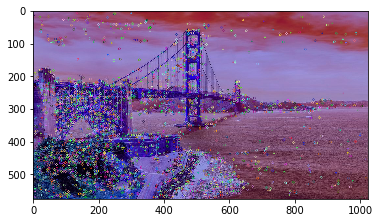

In [29]:
plt.figure()
plt.imshow(textured)
plt.show()

On lines 22, 23 and 24 we load FlannBasedMatcher which it the method used to find the matches between the descriptors of the 2 images.
On line 26 we find the matches between the 2 images. We’re storing the matches in the array ‘matches’.
The array will contain all possible matches, so many false matches as well.

In [0]:
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_1, desc_2, k=2)

In this part we apply the ratio test to select only the good matches.
The quality of a match is define by the distance. The distance is a number, and the lower this number is, the more similar the features are.
By applying the ratio test we can decide to take only the matches with lower distance, so higher quality.

If you decrease the ratio value, for example to 0.1 you will get really high quality matches, but the downside is that you will get only few matches.
If you increase it you will get more matches but sometimes many false ones.

In [19]:
good_points = []
ratio = 0.3
for m, n in matches:
    if m.distance < ratio*n.distance:
        good_points.append(m)
        print(len(good_points))

result = cv2.drawMatches(original, kp_1, mixed_colors, kp_2, good_points, None)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
